<a href="https://colab.research.google.com/github/StephenTGibson/genetic-algorithms/blob/main/Demo_solve_the_travelling_salesperson_problem_using_a_genetic_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load libraries and genetic algorithm

In [1]:
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
import matplotlib

# load tsp ga class from github
!git clone https://github.com/StephenTGibson/genetic-algorithms.git &> /dev/null
import sys
sys.path.append('/content/genetic-algorithms')
from travellingSalespersonProblem import *

Define the problem

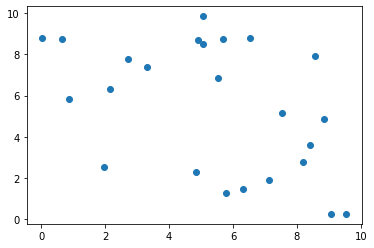

In [2]:
# number of locations
nodes = 24
# maximum dimensions of bounding box which locations are within
bounds = np.array([10, 10])
# weighted adjacency graph, array containing location coordinates
graph, locArr = makeRealGraph(numLocations=nodes, bounds=bounds)

# plot problem locations
fig, ax = plt.subplots()
ax.scatter(
    x=locArr[:,0],
    y=locArr[:,1]
)
plt.show()

Define GA parameters and initialise

In [3]:
# population size, constant throughout evolution
initialPopulation = 80
# how selection occurs
selectionMechanism = 'Roulette'
# number of crossover points (int or random)
crossoverPoints = 'random'
elitism = True
mutation = True
mutationRate = 0.15
permitInvalidSolutions = False
tsp = TravellingSalespersonGA(
    initialPopulation,
    selectionMechanism,
    crossoverPoints,
    elitism,
    mutation,
    mutationRate,
    permitInvalidSolutions,
    graph,
    )

Perform evolution to solve the problem

In [4]:
# number of generations
generations = 1200
# number of generations after which if the maximum solution fitness does not change, evolution will be halted
earlyStopGenerations = int(generations*0.5)
tsp.evolve(
    generations,
    earlyStopGenerations,
    )

Compute problem complexity

As the number of locations increases, the number of possible orders (permutations) increases as the factorial of nodes

As all paths are complete circuits, e.g. 1 -> 2 -> 3 == 2 -> 3 -> 1, the number of unique solutions = factorial/nodes

In [5]:
# compute factorial of number of locations
permutations = 1
current = 1
while current <= nodes:
    permutations = current * permutations
    current += 1

Generate purely random solutions to benchmark success of GA

Number of solutions generated is equal to the number of solutions evaluated throughout the previous evolutionary process, to see if the GA is any better than random chance



In [6]:
# initialise new random benchmark tsp solver
rand = TravellingSalespersonGA(
    initialPopulation,
    selectionMechanism,
    crossoverPoints,
    elitism,
    mutation,
    mutationRate,
    permitInvalidSolutions,
    graph,
    )
# generate solutions
rand.randomBenchmark(generations)

Identify best solution and create array of location coordinates following path

In [7]:
# get best solution
best = np.array(tsp.pop)[tsp.validArr][np.argmax(tsp.fitArr[tsp.validArr])]
# create array of location coordinates in order of best solution
pathArray = np.zeros((nodes+1, bounds.shape[0]))
for idx, loc in enumerate(best):
    pathArray[idx] = locArr[loc]

Plot results!

With 24 locations there are 2.6e+22 possible unique paths

Solutions evaluated by GA: 9.6e+04



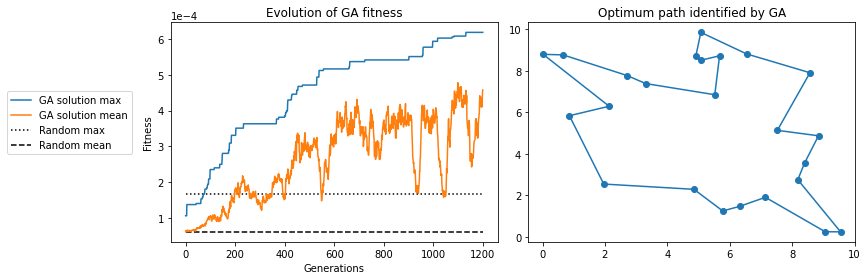

In [8]:
print(f'With {nodes} locations there are {(permutations/nodes):.1e} possible unique paths\n')
print(f'Solutions evaluated by GA: {(initialPopulation*generations):.1e}\n')

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# plot evolution of best solution's fitness
axs[0].plot(
    range(tsp.history.shape[0]),
    tsp.history[:,0],
    label='GA solution max',
    )
# plot evolution of mean solution fitness
axs[0].plot(
    range(tsp.history.shape[0]),
    tsp.history[:,1],
    label='GA solution mean',
    )
# plot maximum fitness found by random sampling
axs[0].hlines(
    rand.fitArrHistory.max(),
    0,
    rand.history.shape[0],
    linestyles='dotted',
    colors='k',
    label='Random max',
    )
# plot mean fitness found by random sampling
axs[0].hlines(
    rand.fitArrHistory.mean(),
    0,
    rand.history.shape[0],
    linestyles='dashed',
    colors='k',
    label='Random mean',
    )

axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[0].set_xlabel('Generations')
axs[0].set_ylabel('Fitness')
axs[0].set_title('Evolution of GA fitness')

# plot locations
axs[1].scatter(
    x=locArr[:,0],
    y=locArr[:,1],
    )
# plot best path
axs[1].plot(
    pathArray[:,0],
    pathArray[:,1],
    )

axs[1].set_title('Optimum path identified by GA')

axs[0].legend(loc=(-0.5, 0.4))
plt.tight_layout()
plt.show()